In [3]:
import os
from pathlib import Path
import torch
torch.cuda.empty_cache()
torch.cuda.get_device_name(0)

'Quadro P2200'

In [4]:
if run_type == 'colab': 
    from google.colab import drive
    drive.mount('/content/drive')

In [5]:
import os
import sys
import seaborn as sns
from tkinter import Tcl
import matplotlib.pyplot as plt
import h5py
from torch.utils.data import DataLoader, TensorDataset

In [6]:
if run_type == 'local' or run_type == 'work_station1' or run_type == 'work_station0':
    os.chdir(Path.cwd())
    #%cd C:\\Users\\ARYAP\\Desktop\\Study BBSR\\2. May 21 BBSR\\Zabaras Conditional Invertible NN\\inn-surrogate-mod\\inn-surrogate-mod-main_64_Final-V7_7\\two_dim
else:
    path1 = f'/content/drive/My Drive/Colab Notebooks/Zabaras Conditional Invertible NN/inn-surrogate-mod/inn-surrogate-mod-main_64_Final-{ver}/two_dim'
    if os.path.exists(path1):
        os.chdir(path1)    
    else:
        path2 = f'/content/drive/My Drive/Colab Notebooks/inn-surrogate-mod/inn-surrogate-mod-main_64_Final-{ver}/two_dim'
        os.chdir(path2)
    # %cd /content/drive/My Drive/Colab Notebooks/Zabaras Conditional Invertible NN/inn-surrogate-mod/inn-surrogate-mod-main_64_Final-V8_5/two_dim
from pathlib import Path
import numpy as np
import torch

from utils.plot_samples import save_samples


project_path = Path().cwd().parent / "two_dim"
if project_path not in sys.path:
    sys.path.append(str(project_path))
print("Project path:", project_path)

os.chdir(Path.cwd().parent)
# %cd C:\Users\ARYAP\Desktop\Study BBSR\2. May 21 BBSR\Zabaras Conditional Invertible NN\inn-surrogate-mod\inn-surrogate-mod-main_64_Final-V6
from two_dim.args import args, device
from two_dim.train import train, test, init_networks
from two_dim.utils.load_data import load_data
from two_dim.utils.load_data_v7_6 import load_data_v7_6

results_dir = str(project_path / "results")

if not os.path.exists(results_dir):
    os.makedirs(results_dir)

Project path: D:\C Data\ARYA\Documents\inn-surrogate-mod\Final_Runs\Final-V8_10_11_ReRun_4_Imgs\two_dim
Random Seed:  1


In [7]:
pwd

'D:\\C Data\\ARYA\\Documents\\inn-surrogate-mod\\Final_Runs\\Final-V8_10_11_ReRun_4_Imgs'

In [8]:
if run_type == 'local' or run_type == 'work_station0':
    device = torch.device("cpu")

In [9]:
if run_type == 'local':
    data_type = "synthetic_v7"
    ntrain = 100
elif run_type == 'work_station1' or run_type == 'work_station0':
    data_type = "synthetic"
    ntrain = 6000
else:
    data_type = "synthetic"
    ntrain = 6000

input_size = 64
output_size = 64

if run_type == 'colab':
    path = '/content/drive/My Drive/Colab Notebooks/Zabaras Conditional Invertible NN/inn-surrogate-mod/Data/X_y_8568_all_iter_new.hdf5'
    if os.path.exists(path):
        Train_hdf5_file = path
    else:
        Train_hdf5_file = '/content/drive/My Drive/Colab Notebooks/HDF5/X_y_8568_all_iter_new.hdf5'
            
else:
    path = 'E:\\inn-surrogate-mod'
    if os.path.exists(path):
        Train_hdf5_file = 'E:\\inn-surrogate-mod\\X_y_8580_all_iter_new.hdf5'
    elif os.path.exists( Path.cwd().parent.parent / "Data"):
        Train_hdf5_file = Path.cwd().parent.parent / "Data"/ "X_y_8568_all_iter_new.hdf5"
    elif os.path.exists('C:\\Users\\ARYA\\Documents\\inn-surrogate-mod\\Data'):
        Train_hdf5_file = 'C:\\Users\\ARYA\\Documents\\inn-surrogate-mod\\Data\\X_y_8580_all_iter_new.hdf5'
    else:
        Train_hdf5_file ='C:\\Users\\ARYAP\Desktop\\Study BBSR\\2. May 21 BBSR\\Zabaras Conditional Invertible NN\\inn-surrogate-mod\\Data_HDF5\\X_y_8580_all_iter_new.hdf5'

with h5py.File(Train_hdf5_file, 'r') as f:
    print(len(f['x_train_all']))
    x_train = f['x_train_all'][:ntrain]
    y_train = f['y_train_all'][:ntrain][:,[0,3,6,9],:,:]
    x_test = f['x_test_all'][:int(ntrain/3)]
    y_test = f['y_test_all'][:int(ntrain/3)][:,[0,3,6,9],:,:]
    print('x_train:',x_train.shape)
    print('y_train:',y_train.shape)
    print('x_test:',x_test.shape)
    print('y_test:',y_test.shape)
    

train_loader = DataLoader(TensorDataset(torch.FloatTensor(x_train),torch.FloatTensor(y_train)), batch_size=16, shuffle=True, drop_last=True)
test_loader = DataLoader(TensorDataset(torch.FloatTensor(x_test),torch.FloatTensor(y_test)),batch_size=16, shuffle=False, drop_last=True)
# sample_loader = DataLoader(TensorDataset(torch.FloatTensor(x_test),torch.FloatTensor(y_test)),batch_size=1, shuffle=False, drop_last=True)

INN_network, cond_network, device, optimizer = init_networks(args, device, train_loader)

6426
x_train: (6000, 64, 64)
y_train: (6000, 4, 64, 64)
x_test: (2000, 64, 64)
y_test: (2000, 4, 64, 64)
Params: gen network 13.020608M, cond network: 44.577392M


In [10]:
print(Path.cwd())
if os.path.exists( Path.cwd().parent.parent / "Data"):
    Sample_hdf5_file = Path.cwd().parent.parent / "Data"/ "sample_xy_12_all_iter_new.hdf5"
else:
    print("Error in sample file finding out")
        
n_sa= 12    
with h5py.File(Sample_hdf5_file, 'r') as s:
    sa_x = s['sa_x'][:n_sa]
    sa_y = s['sa_y'][:n_sa][:,[0,3,6,9],:,:]

sample_loader = DataLoader(TensorDataset(torch.FloatTensor(sa_x),torch.FloatTensor(sa_y)),batch_size=12, shuffle=False, drop_last=True)

D:\C Data\ARYA\Documents\inn-surrogate-mod\Final_Runs\Final-V8_10_11_ReRun_4_Imgs


In [11]:
sa1, sa2 = next(iter(sample_loader))
print(sa1.shape)  # torch.Size([12, 64, 64])
print(sa2.shape)  # torch.Size([12, 10, 64, 64])

torch.Size([12, 64, 64])
torch.Size([12, 4, 64, 64])


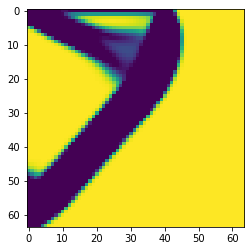

In [14]:
%matplotlib inline
plt.imshow(sa2[6][3])

In [15]:
args

Namespace(batch_size=16, cond_size=4, cond_size1=16, cond_size2=32, cond_size3=512, epochs=200, hidden_layer3=4096, hidden_layer_channel=64, hidden_layer_channel1=64, hidden_layer_channel2=96, input_dimension1=4, input_dimension12=3, input_dimension1_r=[(2, 32, 32)], input_dimension2=8, input_dimension22=3, input_dimension2_r=[(4, 16, 16)], input_dimension3=1024, input_dimension32=1, lr=0.00012, ntest=128, ntrain=10000, permute_a1=4, permute_a2=8, permute_a3=1024, seed=1, split_channel=[2, 2], test_batch_size=128, weight_decay=3e-05)

In [16]:
y_train_new = y_train[:,:2,:,:]

In [17]:
y_train_new.shape

(6000, 2, 64, 64)

In [18]:
pwd

'D:\\C Data\\ARYA\\Documents\\inn-surrogate-mod\\Final_Runs\\Final-V8_10_11_ReRun_4_Imgs'

In [19]:
def sample_data_new(epoch, loader, INN_network, cond_network, device, n_samples, save_y=False):
    INN_network.eval()
    cond_network.eval()
    input_all, target_all = next(iter(loader))
    sa_gen = 12
    generated_x_all = np.zeros((12,64,64))
    for i in range(sa_gen):
        input = input_all[i]
        target = target_all[i].reshape(1,4,input_size,input_size)
        input, target = input.to(device), target.to(device)

        x = input.view(1, 1, 64, 64)
        if len(target.shape) != 4:
            target = target.view(1, 4, 64)

        target = target[0, :, :]
        target = target.cpu().data.numpy()
        l = np.repeat(np.array(target)[np.newaxis, :, :], n_samples, axis=0)
        l = torch.Tensor(l).to(device)
        z = torch.randn(n_samples, 4096).to(device)

        with torch.no_grad():
            y1 = cond_network(l)
            input = x.view(1, 4096)
    #         c = y1[2]
    #         c2 = y1[1]
    #         c3 = y1[0]
    #         c4 = y1[3]
            c = y1[0]
            c2 = y1[1]
            c3 = y1[2]
            c4 = y1[3]
            generated_x = INN_network(z, c, c2, c3, c4, forward=False)
        generated_x = generated_x.cpu().data.numpy()
        #generated_x = torch.sigmoid(generated_x)
        input_test = input[0, :].cpu().data.numpy()
        input1 = input_test.reshape(1, 1, 64, 64)
        mean_samples1 = np.mean(generated_x, axis=0)
        mean_samples1 = mean_samples1.reshape(1, 1, 64, 64)
        generated_x = generated_x[:2, :, :, :]
        x1 = np.concatenate((input1, mean_samples1, generated_x), axis=0)
        generated_x_all[i,:,:] = generated_x[0][0]

#     if save_y:
#         save_samples(results_dir, x1, epoch, 2, data_type, nrow=2, heatmap=True, cmap='jet', target_images=target)
#     else:
#         save_samples(results_dir, x1, epoch, 2, data_type, nrow=2, heatmap=True, cmap='jet')
        
        
    return generated_x_all


#sample_data(999, sample_loader, INN_network, cond_network, device, n_samples=1)

In [20]:
r = np.zeros((12,64,64))
r.shape

(12, 64, 64)

In [21]:

for i in range(12):
    r[i,:,:] = sa1[i]

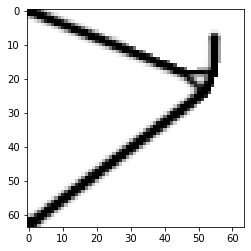

In [22]:
plt.imshow(r[0], cmap = 'gray')


Start training

Adjusting learning rate of group 0 to 1.2000e-04.

 Date (d/m/y): 17/01/2022, Time (H/M/S): 16:22:25 

Epoch 1 - 187/375: Train loss -2.963
Epoch 1 - Train loss -2.498 Test loss -3.269
Epoch 2 - 187/375: Train loss -3.472
Epoch 2 - Train loss -3.419 Test loss -3.521
Epoch 3 - 187/375: Train loss -3.534
Epoch 3 - Train loss -3.595 Test loss -3.642
Epoch 4 - 187/375: Train loss -3.715
Epoch 4 - Train loss -3.688 Test loss -3.713
Epoch 5 - 187/375: Train loss -3.721
Epoch 5 - Train loss -3.746 Test loss -3.762
Epoch 6 - 187/375: Train loss -3.744
Epoch 6 - Train loss -3.790 Test loss -3.802
Epoch 7 - 187/375: Train loss -3.846
Epoch 7 - Train loss -3.825 Test loss -3.831
Epoch 8 - 187/375: Train loss -3.838
Epoch 8 - Train loss -3.840 Test loss -3.845
Epoch 9 - 187/375: Train loss -3.867
Epoch 9 - Train loss -3.873 Test loss -3.875
Epoch 10 - 187/375: Train loss -3.831
Epoch 10 - Train loss -3.893 Test loss -3.892
Epoch 11 - 187/375: Train loss -3.837
Epoch 11 - Train los

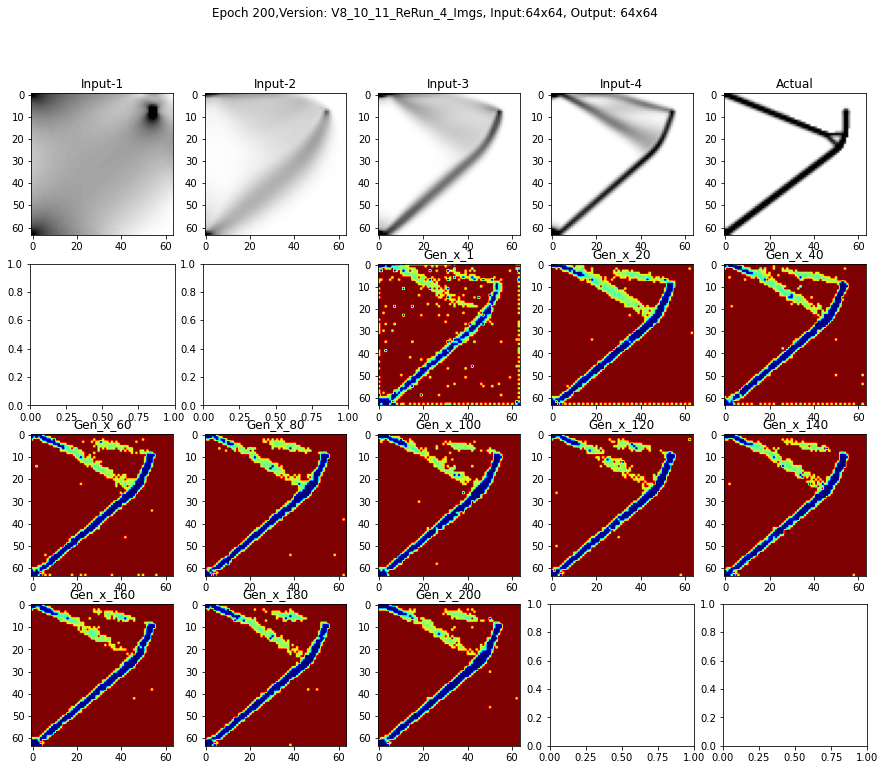

In [25]:
print('\nStart training\n')

loss_train_all = []
loss_test_all = []
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.95, verbose  =True)

if run_type == 'local' or run_type == 'work_station0' :
    no_epoch = 5
    save_int = 2
else:
    no_epoch = args.epochs
    save_int = 20

# no_epoch = 2
# save_int = 1
# no_epoch = 5
# save_int = 2
%matplotlib inline
# print(int(no_epoch/(save_int*5))+2)
input, target = next(iter(sample_loader))   

fig, axs = plt.subplots(int((5+no_epoch/save_int)/5)+1,5, figsize = (3*5, 3*(int(5+no_epoch/save_int)/5+1)))
#plt.figure(figsize = (2*int(no_epoch/(save_int*5))+4,5*2))
axs_no = 0
# axs[1][1].imshow(input[0],cmap = 'gray')
# axs[1][1].set_title('Actual')
axs[0][0].imshow(target[0][0], cmap = 'gray')
axs[0][0].set_title('Input-1')
axs[0][1].imshow(target[0][1],cmap = 'gray')
axs[0][1].set_title('Input-2')
axs[0][2].imshow(target[0][2],cmap = 'gray')
axs[0][2].set_title('Input-3')
axs[0][3].imshow(target[0][3],cmap = 'gray')
axs[0][3].set_title('Input-4')
axs[0][4].imshow(input[0],cmap = 'gray')
axs[0][4].set_title('Actual')
# axs[1][0].imshow(target[0][5],cmap = 'gray')
# axs[1][0].set_title('Input-6')
# axs[1][1].imshow(target[0][6],cmap = 'jet')
# axs[1][1].set_title('Input-7')
# axs[1][2].imshow(target[0][7],cmap = 'jet')
# axs[1][2].set_title('Input-8')
# axs[1][3].imshow(target[0][8],cmap = 'jet')
# axs[1][3].set_title('Input-9')
# axs[1][4].imshow(target[0][9],cmap = 'jet')
# axs[1][4].set_title('Input-10')
axs_no = axs_no + 6

from datetime import datetime
print(f'\n Date (d/m/y): {datetime.now().strftime("%d/%m/%Y")}, Time (H/M/S): {datetime.now().strftime("%H:%M:%S")} \n')

for epoch in range(1,no_epoch+1):
    loss_train = train(epoch, train_loader, INN_network, cond_network, device, optimizer)
    loss_train = np.mean(loss_train)
    loss_train_all.append(loss_train)
    with torch.no_grad():
        #sample_data(epoch, sample_loader, INN_network, cond_network, device, n_samples=1, save_y=False)
        #sample_data_new(epoch, sample_loader, INN_network, cond_network, device, n_samples=1, save_y=False)
        loss_test = test(epoch, test_loader, INN_network, cond_network, device)
        loss_test = np.mean(loss_test)
        loss_test_all.append(loss_test)

    print(f"Epoch {epoch} - Train loss {loss_train:.3f} Test loss {loss_test:.3f}")
    if epoch==1 or epoch % save_int == 0:
        axs_no +=1
        axs_no_row = int(axs_no/5)
        axs_no_col = axs_no - 5*int(axs_no/5)
        gen_x_all = sample_data_new(epoch, sample_loader, INN_network, cond_network, device, n_samples=1, save_y=False)
        
        gen_x_mod = np.zeros((64,64))
        for i in range(64):
            for j in range(64):
                if gen_x_all[1][i][j] > 0.6:
                    gen_x_mod[i,j] = 1
                if gen_x_all[1][i][j] < 0.4:
                    gen_x_mod[i,j] = 0
                if 0.4 <= gen_x_all[1][i][j] <= 0.6:
                    gen_x_mod[i,j] = gen_x_all[1][i][j]   
        axs[axs_no_row][axs_no_col].imshow(gen_x_mod.reshape(64,64),cmap = 'jet')
        axs[axs_no_row][axs_no_col].set_title(f'Gen_x_{epoch}')
        fig.suptitle(f'Epoch {epoch},Version: {ver}, Input:{input_size}x{input_size}, Output: {output_size}x{output_size}',fontsize = 12)
        plt.savefig(f'Generated_x_epoch_{epoch}.png')
        if epoch !=1:
            scheduler.step()
        if run_type == 'work_station1' and epoch == no_epoch:
            gen_model_path = results_dir + f"/generative_network_{ver}_ep{epoch}.pt"
            cond_model_path = results_dir + f"/conditioning_network_{ver}_ep{epoch}.pt"
            print(gen_model_path)
            torch.save(INN_network.state_dict(), gen_model_path)
            torch.save(cond_network.state_dict(), cond_model_path)

plt.show()

gen_model_path = results_dir + "/generative_network.pt"
cond_model_path = results_dir + "/conditioning_network.pt"

if run_type == 'colab':
    torch.save(INN_network, gen_model_path)
    torch.save(cond_network, cond_model_path)

In [26]:
os.path.exists("D:\C Data\ARYA\Documents\inn-surrogate-mod\Final_Runs\inn-surrogate-mod-main_64_Final-V8_10_10_ReRun\two_dim\results\generative_network_V8_10_10_ReRun_ep2.pt")

False

In [27]:
print(os.path.exists("D:\\C Data\\ARYA\Documents\\inn-surrogate-mod\\Final_Runs\\inn-surrogate-mod-main_64_Final-V8_10_10_ReRun\\two_dim"))
print(os.getcwd())

True
D:\C Data\ARYA\Documents\inn-surrogate-mod\Final_Runs\Final-V8_10_11_ReRun_4_Imgs


In [28]:
INN_network.load_state_dict(torch.load("D:\\C Data\\ARYA\\Documents\\inn-surrogate-mod\\Final_Runs\\Final-V8_10_11_ReRun_4_Imgs\\two_dim\\results\\generative_network_V8_10_11_ReRun_4_Imgs_ep200.pt"))
cond_network.load_state_dict(torch.load("D:\\C Data\\ARYA\Documents\\inn-surrogate-mod\\Final_Runs\\Final-V8_10_11_ReRun_4_Imgs\\two_dim\\results\\conditioning_network_V8_10_11_ReRun_4_Imgs_ep200.pt"))

<All keys matched successfully>

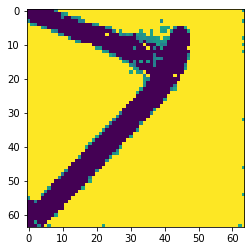

In [29]:
gen_x_all = sample_data_new(100, sample_loader, INN_network, cond_network, device, n_samples=1, save_y=False)
gen_x_mod_all = np.zeros((12,64,64))
for k in range(12):
    for i in range(64):
        for j in range(64):
            if gen_x_all[k][i][j] > 0.6:
                gen_x_mod_all[k,i,j] = 1
            if gen_x_all[k][i][j] < 0.4:
                gen_x_mod_all[k,i,j] = 0
            if 0.4 <= gen_x_all[k][i][j] <= 0.6:
                gen_x_mod_all[k,i,j] = gen_x_all[k][i][j]
    plt.imsave(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_HardTO.png", gen_x_mod_all[k], cmap = "gray")

In [30]:
k

11

In [31]:
import scipy.io
for k in range(12):
    scipy.io.savemat(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_HardTO.mat", mdict = {'arr':gen_x_mod_all[k]})
# plt.imsave(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_HardTO.png", gen_x_mod_all[k], cmap = "gray")

In [104]:
results_dir + f"Generated_Sample{k+1}_HardTO.png"

'D:\\C Data\\ARYA\\Documents\\inn-surrogate-mod\\Final_Runs\\inn-surrogate-mod-main_64_Final-V8_10_10_ReRun\\two_dim\\resultsGenerated_Sample12_HardTO.png'

In [96]:
plt.imshow(gen_x_mod_all[12])

IndexError: index 12 is out of bounds for axis 0 with size 12

In [ ]:
gen_x_2 = sample_data_new(epoch, sample_loader, gen_2, cond_2, device, n_samples=1, save_y=False)

In [ ]:
no_epoch

In [ ]:
%matplotlib inline
input, target = next(iter(sample_loader))   

fig, axss = plt.subplots(2,4, figsize = (3*4, 3*2))


axss[1][0].imshow(input[0],cmap = 'gray')
axss[1][0].set_title('Actual')

axss[0][0].imshow(target[0][0], cmap = 'gray')
axss[0][0].set_title('Input-1')

axss[0][1].imshow(target[0][1],cmap = 'gray')
axss[0][1].set_title('Input-2')

axss[0][2].imshow(target[0][2],cmap = 'gray')
axss[0][2].set_title('Input-3')

axss[0][3].imshow(target[0][3],cmap = 'gray')
axss[0][3].set_title('Input-4') 

axss[1][2].set_title(f'After TO + Hard Tanh filter'  )
axss[1][2].imshow(gen_x_mod_2 ,cmap = 'gray')

axss[1][1].imshow(gen_x_mod_3, cmap = 'gray')
axss[1][1].set_title(f'Only hard Tanh')

axss[1][3].imshow(input[0],cmap = 'gray')
axss[1][3].set_title('ML+MATLAB')

plt.show()

In [ ]:
sample_data_new(epoch, sample_loader, INN_network, cond_network, device, n_samples=1, save_y=False)

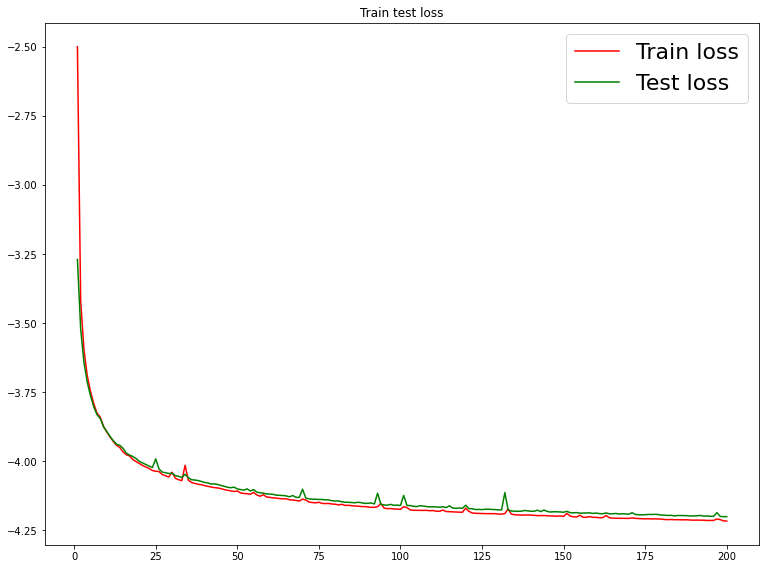

In [32]:
import matplotlib.pyplot as plt
x = [] 
y = [] 
z = []
x = list(range(1,no_epoch+1))
y = loss_train_all
z = loss_test_all
%matplotlib inline
plt.figure(figsize=(6.4*2,4.8*2))
plt.rcParams["legend.fontsize"] = 22
plt.plot(x, y, color = 'r', label = 'Train loss')
plt.plot(x, z, color = 'g', label = 'Test loss')
plt.title('Train test loss')
plt.legend()
fname = Path.cwd() / "two_dim" / "results" / " train_test_loss.png"
plt.savefig(fname)
plt.show()

In [48]:
if run_type == 'colab':
    path = '/content/drive/My Drive/Colab Notebooks/Zabaras Conditional Invertible NN/inn-surrogate-mod/Data/X_y_44_14_sample.hdf5'
    if os.path.exists(path):
        X_y_44_14_sample = path
    else:
        X_y_44_14_sample = '/content/drive/My Drive/Colab Notebooks/HDF5/X_y_44_14_sample.hdf5'
            
else:
    path = 'E:\\inn-surrogate-mod'
    if os.path.exists(path):
        X_y_44_14_sample = 'E:\\inn-surrogate-mod\\X_y_44_14_sample.hdf5'
    elif os.path.exists('C:\\Users\\ARYA\\Documents\\inn-surrogate-mod\\Data'):
        X_y_44_14_sample = 'C:\\Users\\ARYA\\Documents\\inn-surrogate-mod\\Data\\X_y_44_14_sample.hdf5'
    else:
        X_y_44_14_sample ='C:\\Users\\ARYAP\Desktop\\Study BBSR\\2. May 21 BBSR\\Zabaras Conditional Invertible NN\\inn-surrogate-mod\\Data_HDF5\\X_y_44_14_sample.hdf5'
        
print(X_y_44_14_sample)

with h5py.File(X_y_44_14_sample, 'r') as f:
    print(len(f['x_sample']))
    x_sample = f['x_sample'][:ntrain]
    y_sample= f['y_sample'][:ntrain][:,4:10,:,:]
#     x_sample_2 = f['x_test_all'][:int(ntrain/3)]
#     y_sample_2 = f['y_test_all'][:int(ntrain/3)][:,4:10,:,:]
    print('x_sample:',x_sample.shape)
    print('y_sample:',y_sample.shape)
#     print('x_sample_2:',x_sample_2.shape)
#     print('y_sample_2:',y_sample_2.shape)

# train_loader = DataLoader(TensorDataset(torch.FloatTensor(x_train),torch.FloatTensor(y_train)), batch_size=16, shuffle=True, drop_last=True)
# test_loader = DataLoader(TensorDataset(torch.FloatTensor(x_test),torch.FloatTensor(y_test)),batch_size=16, shuffle=False, drop_last=True)
sample_loader_1 = DataLoader(TensorDataset(torch.FloatTensor(x_sample),torch.FloatTensor(y_sample)),batch_size=1, shuffle=False, drop_last=True)

# INN_network, cond_network, device, optimizer = init_networks(args, device, train_loader)

C:\Users\ARYAP\Desktop\Study BBSR\2. May 21 BBSR\Zabaras Conditional Invertible NN\inn-surrogate-mod\Data_HDF5\X_y_44_14_sample.hdf5


OSError: Unable to open file (unable to open file: name = 'C:\Users\ARYAP\Desktop\Study BBSR\2. May 21 BBSR\Zabaras Conditional Invertible NN\inn-surrogate-mod\Data_HDF5\X_y_44_14_sample.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
sa_x, sa_y = next(iter(sample_loader_1))

In [ ]:
sa_x.shape

In [ ]:
sa_y.shape

In [ ]:
plt.imshow(sa_y[0][4].reshape(64,64), cmap = 'gray')

In [ ]:
gen_x_1 = sample_data_new(epoch, sample_loader, INN_network, cond_network, device, n_samples=1, save_y=False)

In [ ]:
plt.imshow(gen_x_1[0][0], cmap = 'gray')

In [ ]:
gen_x_mod_1 = np.zeros((64,64))
for i in range(64):
    for j in range(64):
        if gen_x_1[0][0][i][j] > 0.5:
            gen_x_mod_1[i,j] = 1
        if gen_x_1[0][0][i][j] < 0.5:
            gen_x_mod_1[i,j] = 0
        if 0.5 <= gen_x_1[0][0][i][j] <= 0.5:
            gen_x_mod_1[i,j] = gen_x_1[0][0][i][j]

In [ ]:
# plt.imshow(gen_x_mod_1, cmap = 'gray', title = 'xtz')
plt.imshow(gen_x_mod_1,cmap = 'gray')
plt.title('Filtered ML Generated')
plt.show()

In [ ]:
plt.imshow(sa_x[0].reshape(64,64))

In [ ]:
import scipy.io
scipy.io.savemat('gen_x_mod_1.mat', mdict = {'arr':gen_x_mod_1})

In [ ]:
import math
import numpy as np
import scipy
import scipy.sparse
iH = np.ones(nelx*nely*(2*(math.ceil(rmin)-1)+1)**2).astype(int)
jH = np.ones(iH.shape).astype(int)
sH = np.zeros(iH.shape)
k = 0
for i1 in range(1,nelx+1):
    for j1 in range(1,nely+1):
        e1 = (i1-1)*nely + j1
        for i2 in range(max(i1-(math.ceil(rmin)-1),1),min(i1+(math.ceil(rmin)-1),nelx)+1):
            for j2 in range(max(j1-(math.ceil(rmin)-1),1),min(j1+(math.ceil(rmin)-1),nely)+1):
                e2 = (i2-1)*nely+j2 
#                 print(f' i1 = {i1}, j1 = {j1}, i2 = {i2}, j2 = {j2}, e1 = {e1}, e2 = {e2}' )
#                 print(f'i2 range = {max(i1-(math.ceil(rmin)-1),1)} to {min(i1+(math.ceil(rmin)-1),nelx)}')
#                 print(f'j2 range =  {max(j1-(math.ceil(rmin)-1),1)} to {min(j1+(math.ceil(rmin)-1),nelx)}' )
                k = k+1
#                 print(f'k = {k}')
                iH[k-1] = e1
                jH[k-1] = e2
                sH[k-1] = max(0,rmin-math.sqrt((i1-i2)**2+(j1-j2)**2))

H = scipy.sparse.csc_matrix((sH,(iH-1,jH-1)))
Hs = np.sum(H, axis=1)

In [ ]:
plt.imshow(gen_x_mod.reshape(64,64))

In [41]:
import math
import numpy as np
import scipy
import scipy.sparse
nelx = 64
nely = 64
rmin = 1.5
iH = np.ones(nelx*nely*(2*(math.ceil(rmin)-1)+1)**2).astype(int)
jH = np.ones(iH.shape).astype(int)
sH = np.zeros(iH.shape)
k = 0
for i1 in range(1,nelx+1):
    for j1 in range(1,nely+1):
        e1 = (i1-1)*nely + j1
        for i2 in range(max(i1-(math.ceil(rmin)-1),1),min(i1+(math.ceil(rmin)-1),nelx)+1):
            for j2 in range(max(j1-(math.ceil(rmin)-1),1),min(j1+(math.ceil(rmin)-1),nely)+1):
                e2 = (i2-1)*nely+j2 
#                 print(f' i1 = {i1}, j1 = {j1}, i2 = {i2}, j2 = {j2}, e1 = {e1}, e2 = {e2}' )
#                 print(f'i2 range = {max(i1-(math.ceil(rmin)-1),1)} to {min(i1+(math.ceil(rmin)-1),nelx)}')
#                 print(f'j2 range =  {max(j1-(math.ceil(rmin)-1),1)} to {min(j1+(math.ceil(rmin)-1),nelx)}' )
                k = k+1
#                 print(f'k = {k}')
                iH[k-1] = e1
                jH[k-1] = e2
                sH[k-1] = max(0,rmin-math.sqrt((i1-i2)**2+(j1-j2)**2))

H = scipy.sparse.csc_matrix((sH,(iH-1,jH-1)))
Hs = np.sum(H, axis=1)

In [42]:
gen_x_mod_TO = np.zeros((12,64,64))
for k in range(12):
    row = gen_x_all[k].flatten()[np.newaxis]
    gen_x_mod_TO[k] = (H*(row.T)/Hs).reshape(64,64)
    gen_x_mod_TO[k] = np.squeeze(np.asarray(gen_x_mod_TO[k]))
    plt.imsave(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_Only_TOF.png", gen_x_mod_TO[k], cmap = "gray")

In [43]:
import scipy.io
for k in range(12):
    scipy.io.savemat(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_TOPO.mat", mdict = {'arr':gen_x_mod_TO[k]})
# plt.imsave(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_HardTO.png", gen_x_mod_all[k], cmap = "gray")

In [44]:
# gen_x_all = sample_data_new(100, sample_loader, INN_network, cond_network, device, n_samples=1, save_y=False)
gen_x_mod_both = np.zeros((12,64,64))
for k in range(12):
    for i in range(64):
        for j in range(64):
            if gen_x_mod_TO[k][i][j] > 0.6:
                gen_x_mod_both[k,i,j] = 1
            if gen_x_mod_TO[k][i][j] < 0.4:
                gen_x_mod_both[k,i,j] = 0
            if 0.4 <= gen_x_mod_TO[k][i][j] <= 0.6:
                gen_x_mod_both[k,i,j] = gen_x_mod_TO[k][i][j]
    plt.imsave(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_Both_TO_HTH.png", gen_x_mod_both[k], cmap = "gray")

In [45]:
import scipy.io
for k in range(12):
    scipy.io.savemat(results_dir + "\\" + "generated_samples\\" +  f"Generated_Sample_{k+1}_Both_TO_HTH.mat", mdict = {'arr':gen_x_mod_both[k]})

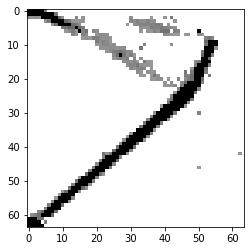

In [46]:
plt.imshow(gen_x_mod.reshape(64,64), cmap = 'gray')